## Fazendo comparações internacionais

<br>
<br>
O conjunto de dados [World Development Indicators](http://data.worldbank.org/data-catalog/world-development-indicators), organizado pelo Banco Mundial, é uma fonte muito abrangente e rigorosa de dados socioeconômicos comparáveis entre um grande número de países. Os dados podem ser baixados no link acima.

As listas de variáveis e de siglas dos países está no final deste notebook.
Como a lista é muito grande, uma seleção delas é apresentada no arquivo `wdi_variaveis_selecionadas.xlsx` (apenas a lista das variáveis, sem os dados).


<br>
<br>

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

pd.options.display.max_rows = 500      # mostrar todas as linhas, não truncar
pd.options.display.max_colwidth = 500  # mostrar colunas largas, não truncar 

### Lendo os dados

In [3]:
wdi = pd.read_csv('/home/lincoln/Downloads/dados/world_bank/wdi/WDIData.csv')

wdi = wdi.rename(columns={
        'Country Code': 'country',
        'Indicator Code': 'indicator',
        'Country Name': 'country_name', 
        'Indicator Name': 'indicator_name'
    })

In [4]:
wdi.shape

(409992, 62)

In [6]:
wdi.columns

Index(['country_name', 'country', 'indicator_name', 'indicator', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [7]:
wdi.head(2)

,country_name,country,indicator_name,indicator,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analisando variáveis e países específicos

Você pode usar os comandos abaixo para analisar diferentes países e variáveis, basta substituir os nomes nas listas que estão no início.

<br>

In [8]:
indicador = ["NY.GDP.PCAP.KD"]
paises = ["BRA", "ARG"]

wdi2 =  wdi.query('country == @paises & indicator == @indicador') 
                              # atenção: use @ antes do nome da lista e do indicador
                              # porque a lista não faz parte do dataframe

wdi2 = wdi2.drop(['country', 'indicator_name', 'indicator'], axis=1) # descarta colunas desnecessárias 
wdi2 = wdi2.T                      # transpõe o dataframe
wdi2.columns = wdi2.iloc[0, :]     # transforma a primeira linha em nome das colunas
wdi2 = wdi2.iloc[1:, :]            # descarta a primeira linha

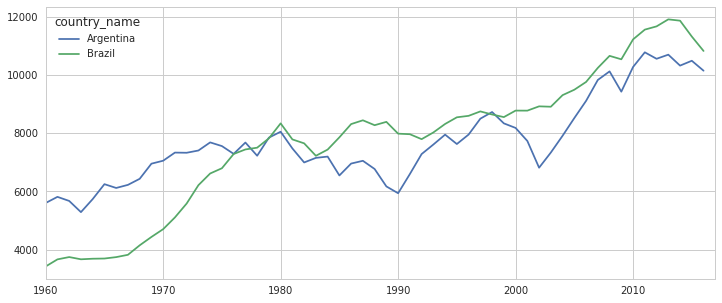

In [9]:
wdi2.plot(figsize=(12, 5));

### Criando um dataframe comparativo

Suponha que queremos comparar a taxa de gravidez na adolescência em todos os países, em dois momentos no tempo.

O comando necessário é o seguinte:

In [10]:
wdi.query('indicator == "SP.ADO.TFRT"')[['country_name', 'country', '1980', '2014']].sort_values(by='2014').dropna()

,country_name,country,1980,2014
231452,"Korea, Dem. People’s Rep.",PRK,4.875400,0.560800
233005,"Korea, Rep.",KOR,13.275800,1.658400
365010,Switzerland,CHE,9.842000,3.057800
205051,"Hong Kong SAR, China",HKG,11.999200,3.266200
253194,"Macao SAR, China",MAC,9.016000,3.497200
337056,Singapore,SGP,11.406600,3.833400
341715,Slovenia,SVN,51.317200,3.920800
288913,Netherlands,NLD,8.859000,4.088800
155355,Denmark,DNK,15.661400,4.119200
223687,Japan,JPN,4.041000,4.158400


Um gráfico da taxa de gravidez na adolescência no Brasil e na Dinamarca.

In [11]:
indicador = ["SP.ADO.TFRT"]
paises = ["BRA", "DNK"]

wdi2 =  wdi.query('country == @paises & indicator == @indicador') 
                              # atenção: use @ antes do nome da lista e do indicador
                              # porque a lista não faz parte do dataframe

wdi2 = wdi2.drop(['country', 'indicator_name', 'indicator'], axis=1) # descarta colunas desnecessárias 
wdi2 = wdi2.T                      # transpõe o dataframe
wdi2.columns = wdi2.iloc[0, :]     # transforma a primeira linha em nome das colunas
wdi2 = wdi2.iloc[1:, :]            # descarta a primeira linha

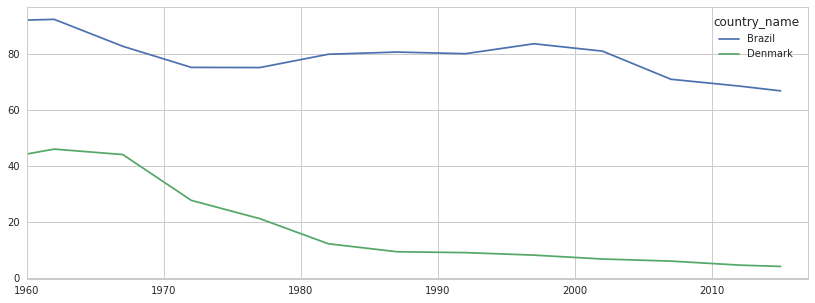

In [12]:
wdi2.plot(figsize=(14, 5));

<br>
<br>
<br>
<br>
### Lista de países e suas siglas

In [14]:
wdi[['country_name', 'country']].drop_duplicates()

,country_name,country
0,Arab World,ARB
1553,Caribbean small states,CSS
3106,Central Europe and the Baltics,CEB
4659,Early-demographic dividend,EAR
6212,East Asia & Pacific,EAS
7765,East Asia & Pacific (excluding high income),EAP
9318,East Asia & Pacific (IDA & IBRD countries),TEA
10871,Euro area,EMU
12424,Europe & Central Asia,ECS
13977,Europe & Central Asia (excluding high income),ECA


<br>
<br>
<br>

### Lista de variáveis e suas siglas

In [20]:
wdi[['indicator', 'indicator_name']].drop_duplicates()

,indicator,indicator_name
0,PA.NUS.PPP.05,"2005 PPP conversion factor, GDP (LCU per international $)"
1,PA.NUS.PRVT.PP.05,"2005 PPP conversion factor, private consumption (LCU per international $)"
2,EG.CFT.ACCS.ZS,Access to clean fuels and technologies for cooking (% of population)
3,EG.ELC.ACCS.ZS,Access to electricity (% of population)
4,EG.ELC.ACCS.RU.ZS,"Access to electricity, rural (% of rural population)"
5,EG.ELC.ACCS.UR.ZS,"Access to electricity, urban (% of urban population)"
6,WP_time_10.1,Account (% age 15+) [ts]
7,WP_time_01.1,Account at a financial institution (% age 15+)
8,WP_time_01.3,"Account at a financial institution, female (% age 15+)"
9,WP_time_01.8,"Account at a financial institution, income, poorest 40% (% ages 15+)"
